# Лабораторная 1 | 9 Вариант | Райцын (15 АС)

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("Seasons_Stats.csv")

1. Определите игрока, принявшего участие в наибольшем числе игр.

In [11]:
#подсчитываем количество вхождений имен в таблицу
#и выводим соответсвующее имя
df['Player'].value_counts().idxmax()

'Eddie Johnson'

2. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [52]:
#Корреляция Пирсона
from scipy.stats import pearsonr
pr = df.corr('pearson')['Age']['G']
pearsonr(df['Age'], df['G'])

C:\Users\Андрей\AppData\Local\Programs\Python\python-3.6.3.amd64\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(nan, 1.0)

In [51]:
#Корреляция Спирмена
from scipy.stats import spearmanr as spr
sp = df.corr('spearman')['Age']['G']
spr(df['Age'], df['G'], nan_policy = 'omit')

SpearmanrResult(correlation=0.042145961863817694, pvalue=masked_array(data = 3.713295632501198e-11,
             mask = False,
       fill_value = 1e+20)
)

Сравнение результатов
_____________________
Коэфиценты корреляции Спирмена и Пирсона малы, а потому можно сделать вывод что корреляция слабо выражена

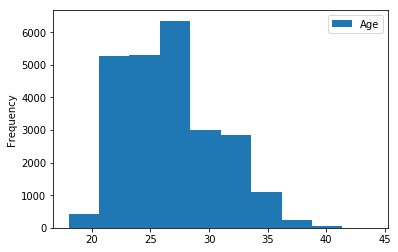

In [13]:
#Гистограма Age
df['Age'].plot(kind="hist", legend = True)
plt.show()

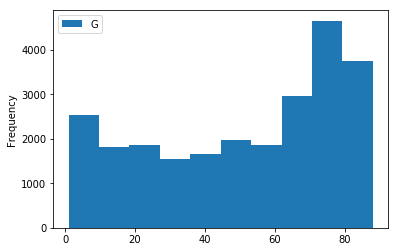

In [14]:
#Гистограма G
df['G'].plot(kind="hist", legend = True)
plt.show()

3. Определите год, в котором наиболее интенсивно играли в баскетбол.

In [7]:
#Год в котором наиболее интенсивно играли
df['Year'].value_counts().idxmax()

2015.0

4. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).

In [26]:
#Позиция игрока с худшим результатом
df.iloc[df['PTS'].idxmin()]['Pos']

'C'

5. Постройте гистограмму возраста игроков.

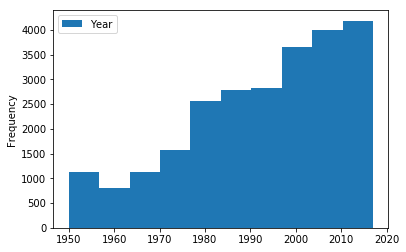

In [17]:
#Гистограма возраста
df['Year'].plot(kind="hist", legend = True)
plt.show()

6. Удалите строки с нулевыми значениями в данных.

In [41]:
#Удалить строки с NaN
#тут любая строка содержит NaN, поэтому я не делаю замену
df.dropna(inplace = False)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


7. Добавьте в набор данных признак, являющийся произведением двух других признаков.

In [2]:
#Признак являющийся произведением двух других признаков
df['Age*G'] = df['Age']*df['G']

8. Определите самое популярное имя среди игроков.

In [30]:
from collections import Counter
#Самое популярное имя среди игроков
#Отделяем имена от фамилий
names[0] = df.Player.apply(lambda x: x.split(' ')[0] if type(x)==str else x)
names[1] = df.Player.apply(lambda x: x.split(' ')[1] if type(x)==str else x)
#создаем множество чтобы отбросить повторяющиеся парым (имя, фамилия) 
#(так как в таблице записьоб одном и том же игроке может встречаться несколько раз)
players = {(names[0][i], names[1][i]) for i in range(len(names[0]))}
un_names = tuple(player[0] for player in players)
print("Most popular name:", max(Counter(un_names).items(), key=lambda x: x[1])[0])

Most popular name: John
